# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alya Nur Aini
- **Email:** alyanuraini1409@gmail.com
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

- Musim apa yang memiliki total penyewaan sepeda terbanyak?
- Pada hari apa penyewaan sepeda paling banyak?
- Jam berapa yang menjadi favorit para penyewa sepeda?
- Seperti apa performa penyewaan sepeda setiap bulannya pada tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [157]:
#import library yang ajan digunakan dalam proyek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [158]:
#Memuat tabel day
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [159]:
#Memuat tabel hour
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Tabel day memiliki 16 kolom dan Tabel hour memilki 17 kolom
- Tabel hour memiliki kolom tambahan bernama hr yang berisi data jam

### Assessing Data

#### Menilai Table `day_df`

In [160]:
#Mengecek tipe data dari tabel day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Tipe data pada kolom dteday masih bertipe object, dan kolom mnth, holiday, weekday, workingday, weathersit masih bertipe data integer.

In [161]:
#Mengecek missing values dari tabel day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ada missing value pada tabel `day_df`.

In [162]:
#Mengecek duplikat dari tabel day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada duplikat pada tabel `day_df`.

In [163]:
#Mengecek parameter statistik dari tabel day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada keanehan pada tabel `day_df`.

#### Menilai Table `hour_df`

In [164]:
#Mengecek tipe data dari tabel hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Tipe data pada kolom dteday masih bertipe object, dan kolom mnth, holiday, weekday, workingday, weathersit masih bertipe data integer.

In [165]:
#Mengecek missing values dari tabel hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ada missing value pada tabel `hour_df`.

In [166]:
#Mengecek duplikat dari tabel hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada duplikat pada tabel `hour_df`.

In [167]:
#Mengecek parameter statistik dari tabel hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada keanehan pada tabel `hour_df`.

### Cleaning Data

#### Membersihkan Table `day_df`

##### Rename Kolom

In [168]:
#Melakukan rename kolom dteday, yr, mnth dan cnt agar lebih mudah dipahami
day_df.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month','cnt':'count_total'}, inplace=True)
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count_total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### Memperbaiki Tipe Data

In [169]:
#Merubah tipe data kolom date dari object to datetime
day_df['date'] = pd.to_datetime(day_df['date'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    int64         
 3   year         731 non-null    int64         
 4   month        731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    int64         
 8   weathersit   731 non-null    int64         
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  count_total  731 non-null    int64         
dtypes: datet

In [170]:
#Merubah tipe data kolom season, month, weekday, weathersit dari int to category
string_columns = ['season', 'month', 'weekday', 'weathersit']

for column in string_columns:
  day_df[column] =  day_df[column].astype("category")
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    int64         
 4   month        731 non-null    category      
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    int64         
 8   weathersit   731 non-null    category      
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  count_total  731 non-null    int64         
dtypes: categ

##### Replace Data

In [171]:
#Replace data di kolom season dari (1,2,3,4) menjadi (1:springer, 2:summer, 3:fall, 4:winter)
day_df['season'] = day_df['season'].replace((1,2,3,4), ('Spring','Summer','Fall','Winter'))

#Replace data di kolom month dari (1 to 12) menjadi (Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Des)
day_df['month'] = day_df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Des'))

#Replace data di kolom weekday dari (0 to 6) menjadi (Sun, Mon, Tue, Wed, Thu, Fri, Sat)
day_df['weekday'] = day_df['weekday'].replace((0,1,2,3,4,5,6), ('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'))

#Replace data di kolom weathersit dari (1,2,3,4) menjadi (1:clear, 2:mist, 3:light_rain, 4:heavy_rain)
day_df['weathersit'] = day_df['weathersit'].replace((1,2,3,4), ('Clear','Mist','Light_rain','Heavy_rain'))

#Replace data di kolom year dari (0,1) menjadi (0: 2011, 1:2012)
day_df['year'] = day_df['year'].replace((0,1), (2011, 2012))

day_df.head()

C:\Users\Pongo\AppData\Local\Temp\ipykernel_39280\2367635714.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['season'] = day_df['season'].replace((1,2,3,4), ('Spring','Summer','Fall','Winter'))
C:\Users\Pongo\AppData\Local\Temp\ipykernel_39280\2367635714.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['month'] = day_df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Des'))
C:\Users\Pongo\AppData\Local\Temp\ipykernel_39280\2367635714.py:8: FutureWarning: The behavior

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count_total
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membersihkan Table `hour_df`

##### Rename Kolom

In [172]:
#Melakukan rename kolom dteday, yr, mnth dan cnt agar lebih mudah dipahami
hour_df.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour','cnt':'count_total'}, inplace=True)
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count_total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Memperbaiki Tipe Data

In [173]:
#Merubah tipe data kolom date dari object to datetime
hour_df['date'] = pd.to_datetime(hour_df['date'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  int64         
 3   year         17379 non-null  int64         
 4   month        17379 non-null  int64         
 5   hour         17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weathersit   17379 non-null  int64         
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  coun

In [174]:
#Merubah tipe data kolom season, month, weekday, weathersit dari int to category
string_columns = ['season', 'month', 'weekday', 'weathersit']

for column in string_columns:
  hour_df[column] =  hour_df[column].astype("category")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  int64         
 4   month        17379 non-null  category      
 5   hour         17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  int64         
 9   weathersit   17379 non-null  category      
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  coun

##### Replace Data

In [175]:
#Replace data di kolom season dari (1,2,3,4) menjadi (1:springer, 2:summer, 3:fall, 4:winter)
hour_df['season'] = hour_df['season'].replace((1,2,3,4), ('Spring','Summer','Fall','Winter'))

#Replace data di kolom month dari (1 to 12) menjadi (Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Des)
hour_df['month'] = hour_df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Des'))

#Replace data di kolom weekday dari (0 to 6) menjadi (Sun, Mon, Tue, Wed, Thu, Fri, Sat)
hour_df['weekday'] = hour_df['weekday'].replace((0,1,2,3,4,5,6), ('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'))

#Replace data di kolom weathersit dari (1,2,3,4) menjadi (1:clear, 2:mist, 3:light_rain, 4:heavy_rain)
hour_df['weathersit'] = hour_df['weathersit'].replace((1,2,3,4), ('Clear','Mist','Light_rain','Heavy_rain'))

#Replace data di kolom year dari (0,1) menjadi (0: 2011, 1:2012)
hour_df['year'] = hour_df['year'].replace((0,1), (2011, 2012))

hour_df.head()

C:\Users\Pongo\AppData\Local\Temp\ipykernel_39280\509142719.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['season'] = hour_df['season'].replace((1,2,3,4), ('Spring','Summer','Fall','Winter'))
C:\Users\Pongo\AppData\Local\Temp\ipykernel_39280\509142719.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['month'] = hour_df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Des'))
C:\Users\Pongo\AppData\Local\Temp\ipykernel_39280\509142719.py:8: FutureWarning: The behavio

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count_total
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada proses cleaning data ini dilakukan rename kolom untuk memudahkan dalam membaca dan mencari kolom.
- Dilakukan juga perubahan tipe data kolom date dari object to datetime dan kolom season, month, weekday, weathersit dari int to category
- Dilakukan replace data kolom season, month, weekday, weathersit, year dari berupa angka menjadi keterangan.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [176]:
#menampilkan rangkuman parameter dari day_df
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count_total
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,Jan,NaN,Sun,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dari rangkuman parameter di atas dapat dilihat bahwa **musim** yang paling **umum** untuk menyewa sepeda adalah musim **Fall**
- Dari rangkuman parameter di atas dapat dilihat bahwa **cuaca** yang paling **umum** untuk menyewa sepeda adalah bulan **Clear**
- Dari rangkuman parameter di atas dapat dilihat bahwa total penyewa sepeda **paling banyak** itu hingga **8714** dan yang **paling sedikit** sekitar **22**

In [177]:
#Memfilter data berdasrkan season untuk melihat total penyewa di tiap seasonnya.
day_df.groupby(by="season").count_total.sum().sort_values(ascending=False)

C:\Users\Pongo\AppData\Local\Temp\ipykernel_39280\1227478987.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").count_total.sum().sort_values(ascending=False)


season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: count_total, dtype: int64

**Insight:**
- Berdasarkan total penyewa sepeda di setiap season, dapat dilihat bahwa musim **Fall** memiliki total penyewa sepeda terbanyak dari musim-musim yang lain.

In [178]:
#Memfilter data berdasrkan weekday untuk melihat total penyewa di tiap harinya.
day_df.groupby(by="weekday").count_total.sum().sort_values(ascending=False)

C:\Users\Pongo\AppData\Local\Temp\ipykernel_39280\513340753.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="weekday").count_total.sum().sort_values(ascending=False)


weekday
Fri    487790
Thu    485395
Sat    477807
Wed    473048
Tue    469109
Mon    455503
Sun    444027
Name: count_total, dtype: int64

**Insight:**
- Berdasarkan total penyewa sepeda di setiap hari, dapat dilihat bahwa hari **Friday** memiliki total penyewa sepeda terbanyak dari hari-hari yang lain.

### Explore `hour_df`

In [179]:
#menampilkan rangkuman parameter dari hour_df
hour_df.describe(include="all")

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count_total
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,Jul,NaN,NaN,Sat,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Bedasarkan rangkuman parameter di atas, rata-rata penyewaan sepeda terjadi pada jam **11**.

In [180]:
#Memfilter data berdasrkan hour untuk melihat total penyewa di tiap jamnya.
hour_df.groupby(by="hour").count_total.sum().sort_values(ascending=False)

hour
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: count_total, dtype: int64

**Insight:**
- Berdasarkan total penyewa sepeda di setiap jamnya, dapat dilihat bahwa total penyewa sepeda terbanyak terdapat pada jam **17**..

In [181]:
#Memfilter data berdasarkan tahun untuk melihat total penyewa di tiap tahunnya.
hour_df.groupby('year').agg({'casual':'sum','registered':'sum'})

,casual,registered
year,,
2011,247252,995851
2012,372765,1676811


**Insight:**
- Berdasarkan total penyewa sepeda di tahun 2011 dan 2012, dapat dilihat total dari penyewa casual dan registered.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Musim apa yang memiliki total penyewa sepeda terbanyak?

In [182]:
#Grouping terhadap season dan count_total
season_sum_df = day_df.groupby(by="season").count_total.sum().sort_values(ascending=False).reset_index()

season_sum_df.head()

C:\Users\Pongo\AppData\Local\Temp\ipykernel_39280\1040481188.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_sum_df = day_df.groupby(by="season").count_total.sum().sort_values(ascending=False).reset_index()


,season,count_total
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


C:\Users\Pongo\AppData\Local\Temp\ipykernel_39280\2563553190.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


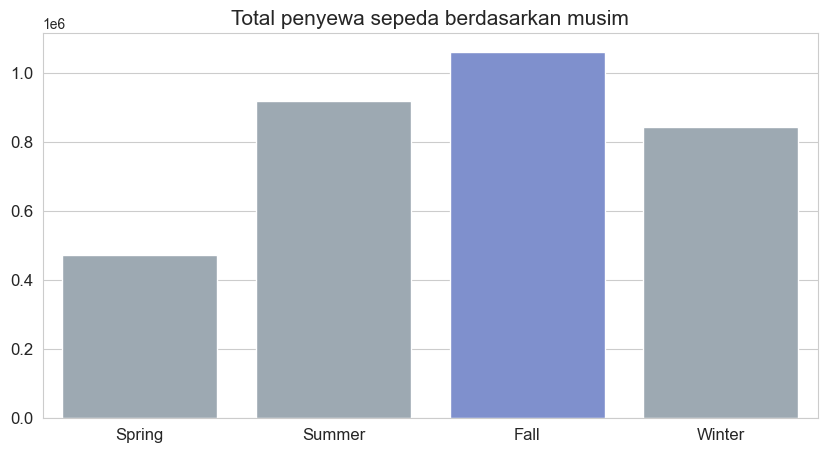

In [183]:
#Membuat figure dengan ukuran 10, 5
plt.figure(figsize=(10, 5))

#Membuat barplot Total penyewa sepeda berdasarkan musim
sns.barplot(
    y="count_total", 
    x="season",
    data=season_sum_df.sort_values(by="season", ascending=False),
    palette=["#99aab5", "#99aab5", "#7289da", "#99aab5"]
)

#Mengatur title pada plot
plt.title("Total penyewa sepeda berdasarkan musim", loc="center", fontsize=15)

#penamaan label y
plt.ylabel(None)

#penamaan label x
plt.xlabel(None)

#mengatur tick parameter x dan y
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

#menampilkan plot
plt.show()

**Insight:**
- Berdasarkan bar plot di atas dapat disimpulkan bahwa musim dengan total penyewa sepeda terbanyak adalah musim **Fall** dan musim yang paling sedikit total penyewa sepedanya adalah musim **spring**.

### Pertanyaan 2: Pada hari apa penyewaan sepeda paling banyak?

In [184]:
#Grouping terhadap weekday dan count_total
weekday_sum_df = day_df.groupby(by="weekday").count_total.sum().sort_values(ascending=False).reset_index()

weekday_sum_df.head(7)


C:\Users\Pongo\AppData\Local\Temp\ipykernel_39280\2254715219.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_sum_df = day_df.groupby(by="weekday").count_total.sum().sort_values(ascending=False).reset_index()


,weekday,count_total
0,Fri,487790
1,Thu,485395
2,Sat,477807
3,Wed,473048
4,Tue,469109
5,Mon,455503
6,Sun,444027


C:\Users\Pongo\AppData\Local\Temp\ipykernel_39280\2692201398.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


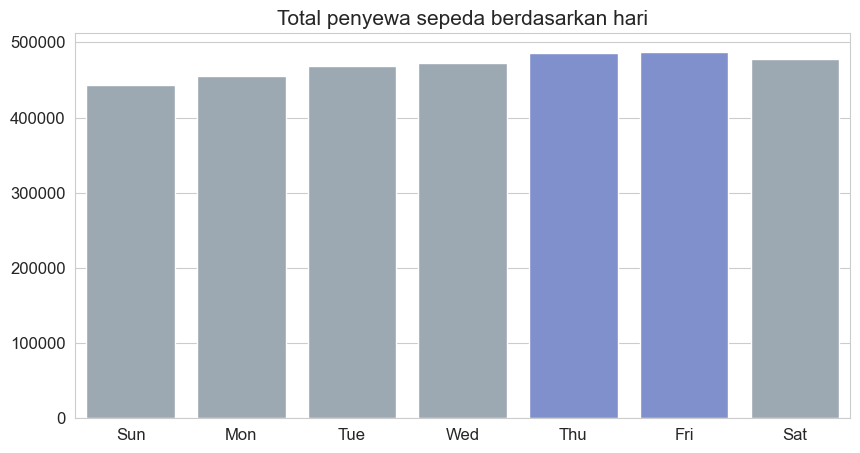

In [185]:
#Membuat figure dengan ukuran 10, 5
plt.figure(figsize=(10, 5))

#Membuat barplot Total penyewa sepeda berdasarkan hari
sns.barplot(
    y="count_total", 
    x="weekday",
    data=weekday_sum_df.sort_values(by="weekday", ascending=False),
    palette=["#99aab5", "#99aab5", "#99aab5", "#99aab5", "#7289da", "#7289da", "#99aab5"]
)

#Mengatur title pada plot
plt.title("Total penyewa sepeda berdasarkan hari", loc="center", fontsize=15)

#penamaan label x dan y
plt.ylabel(None)
plt.xlabel(None)

#mengatur tick parameter x dan y
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

#menampilkan plot
plt.show()

**Insight:**
- Berdasarkan bar plot di atas dapat disimpulkan bahwa hari dengan total penyewa sepeda terbanyak adalah hari **Friday & Thursday** dan hari yang paling sedikit total penyewa sepedanya adalah hari **Sunday**. Namun selisih total penyewa di tiap harinya tidak terlalu jauh sehingga bisa dikatakan total penyewa di tiap harinya hampir sama.

### Pertanyaan 3: Jam berapa yang menjadi favorit para penyewa sepeda?

In [186]:
#Grouping terhadap hour dan count_total
hour_sum_df = hour_df.groupby(by="hour").count_total.sum().sort_values(ascending=False).reset_index()

hour_sum_df.head(24)

,hour,count_total
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


C:\Users\Pongo\AppData\Local\Temp\ipykernel_39280\3379549805.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Pongo\AppData\Local\Temp\ipykernel_39280\3379549805.py:6: UserWarning: 
The palette list has fewer values (23) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


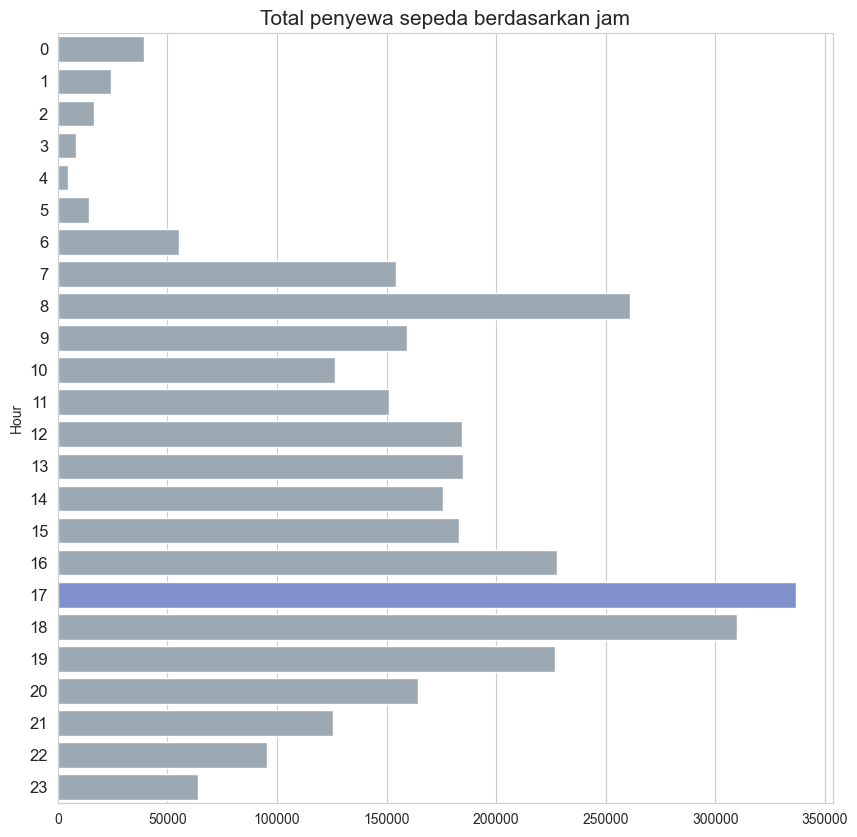

In [187]:
#Membuat figure dengan ukuran 10, 10
plt.figure(figsize=(10, 10))
colors_ = ["#99aab5", "#99aab5", "#99aab5", "#99aab5", "#99aab5", "#99aab5", "#99aab5", "#99aab5", "#99aab5", "#99aab5", "#99aab5", "#99aab5", "#99aab5", "#99aab5", "#99aab5", "#99aab5","#99aab5" , "#7289da", "#99aab5", "#99aab5", "#99aab5", "#99aab5", "#99aab5"]

#Membuat barplot Total penyewa sepeda berdasarkan jam
sns.barplot(
    x="count_total", 
    y="hour",
    data=hour_sum_df.sort_values(by="hour", ascending=False).head(24),
    palette=colors_,
    orient='h'
)

#mengatur title pada plot
plt.title("Total penyewa sepeda berdasarkan jam", loc="center", fontsize=15)

#mengatur label x dan y
plt.ylabel("Hour")
plt.xlabel(None)

#mengatur tick parameter x dan y
plt.tick_params(axis='y', labelsize=12)

#menampilkan plot
plt.show()

**Insight:**
- Berdasarkan bar plot di atas dapat disimpulkan bahwa jam dengan total penyewa sepeda terbanyak adalah jam **17** dan jam yang paling sedikit total penyewa sepedanya adalah jam **4**.

### Pertanyaan 4: Seperti apa performa penyewaan sepeda setiap bulannya pada tahun 2011 dan 2012?

In [188]:
#Grouping terhadap year, month dan count_total
yearmonth_sum_df = day_df.sort_values(["year", "month"]).groupby(["year", "month"]).count_total.sum().reset_index()

yearmonth_sum_df.head(24)

C:\Users\Pongo\AppData\Local\Temp\ipykernel_39280\2263726775.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearmonth_sum_df = day_df.sort_values(["year", "month"]).groupby(["year", "month"]).count_total.sum().reset_index()


,year,month,count_total
0,2011,Jan,38189
1,2011,Feb,48215
2,2011,Mar,64045
3,2011,Apr,94870
4,2011,May,135821
5,2011,Jun,143512
6,2011,Jul,141341
7,2011,Aug,136691
8,2011,Sep,127418
9,2011,Oct,123511


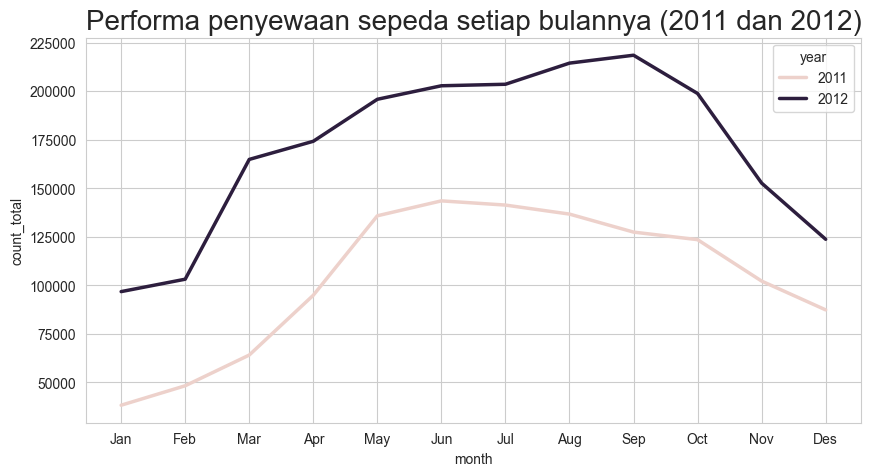

In [189]:
#Membuat figure dengan ukuran 10, 5
plt.figure(figsize=(10, 5)) 

#Membuat barplot performa penyewaan setiap bulannya (2011 dan 2012)
sns.lineplot(
    x='month', 
    y='count_total', 
    data=yearmonth_sum_df.sort_values(["year", "month"]), 
    hue='year',
    linewidth=2.5
) 
#mengatur style plot
sns.set_style("whitegrid")

#mengatur title pada plot
plt.title("Performa penyewaan sepeda setiap bulannya (2011 dan 2012)", loc="center", fontsize=20) 

#mengatur tick parameter x dan y
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 

#menampilkan plot
plt.show()

**Insight:**
- Berdasarkan line plot di atas dapat disimpulkan bahwa performa total penyewaan sepeda di tahun **2012** lebih tinggi dibandingkan dengan performa pada tahun 2011. Bulan **September** menjadi bulan dengan total penyewaan **tertinggi** pada tahun **2012** dan bulan **Januari** menjadi bulan dengan total penyewaan sepeda **terendah** pada tahun yang sama.
- Pada tahun **2011** total penyewaan sepeda **tertinggi** ada pada bulan **Juni** dan yang **terendah** ada pada bulan **Januari**

## Conclusion

- Conclution pertanyaan 1: Musim apa yang memiliki total penyewa sepeda terbanyak?
    Berdasarkan bar plot di atas dapat disimpulkan bahwa musim dengan total penyewa sepeda terbanyak adalah musim **Fall** dengan total penyewa sepeda **1061129** dan musim yang paling sedikit total penyewa sepedanya adalah musim **spring** dengan total penyewa sepeda **471348**.
  
- Conclution pertanyaan 2: Pada hari apa penyewaan sepeda paling banyak?
    Berdasarkan bar plot di atas dapat disimpulkan bahwa hari dengan total penyewa sepeda terbanyak adalah hari **Friday** dengan total penyewa sebanyak **487790** dan hari **Thursday** sebagai peringkat kedua dengan **selisih** hanya **2395**, selain itu hari yang paling sedikit total penyewa sepedanya adalah hari **Sunday**.
  
- Conclution Pertanyaan 3: Jam berapa yang menjadi favorit para penyewa sepeda?
    Berdasarkan bar plot di atas dapat disimpulkan bahwa jam dengan total penyewa sepeda terbanyak adalah jam **17** dengan total penyewa sepeda sebanyak **336860**. Disimpulkan bahwa berdasarkan bar plot tersebut customer lebih suka bersepeda di **sore** hari.

- Conclution Pertanyaan 4: Seperti apa performa penyewaan sepeda setiap bulannya pada tahun 2011 dan 2012?
    Berdasarkan line plot di atas dapat disimpulkan bahwa performa total penyewaan sepeda di tahun **2012** lebih tinggi dibandingkan dengan performa pada tahun 2011 dengan total penyewa tertinggi hingga **218573**. Bulan **September** menjadi bulan dengan total penyewaan **tertinggi** pada tahun **2012** dan bulan **Januari** menjadi bulan dengan total penyewaan sepeda **terendah** pada tahun yang sama. Pada tahun **2011** total penyewaan sepeda **tertinggi** ada pada bulan **Juni** dan yang **terendah** ada pada bulan **Januari**. Berdaasrkan grafik tersebut dapat disimpulkan bahwa ada peningkatan penyewa sepeda pada tahun 2012 secara merata di setiap bulannya. Grafik tersebut juga menunjukkan pola yang sama pada tahun 2011 dan 2012 yang menunjukkan kecenderungan penyewaan sepeda pada setiap bulannya mirip walaupun di tahun yang berbeda.

In [190]:
day_df.to_csv("day_cleaned.csv", index=False)
hour_df.to_csv("hour_cleaned.csv", index=False)